# Setup

In [1]:
# setup
import io
import base64
import sys
import glob
import errno
from collections import defaultdict
import os
import gc

import numpy as np
import h5py
import scipy as sp
import itertools
import multiprocessing as mproc
import pandas as pd
import tensorflow as tf
import sklearn as sk
import cv2

%reload_ext autoreload
%autoreload 2

from IPython.display import display, HTML, Math, Latex
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
#%matplotlib notebook
    
# mpl.rcParams['text.usetex'] = 'True'
mpl.rcParams['axes.grid'] = False
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['xtick.minor.size'] = 7
mpl.rcParams['ytick.minor.size'] = 7
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1.2
mpl.rcParams['ytick.minor.width'] = 1.2
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['legend.fontsize'] = 25
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.serif'] = 'Computer Modern'
mpl.rcParams['xtick.major.pad']='8'
mpl.rcParams['ytick.major.pad']='8'
mpl.rcParams['ytick.major.pad']='8'

blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
red = '#ad494a'
violet = '#9467bd'
brown = '#8c564b'

# Binary classification

In [2]:
# setup
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Sample dataset (binary classification)
data = {
    'feature1': [0.1, 0.2, 0.3, 0.4, 0.5],
    'feature2': [0.5, 0.4, 0.3, 0.2, 0.1],
    'label': [0, 0, 1, 1, 1]  # Binary labels
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features (X) and Labels (y)
X = df[['feature1', 'feature2']].values  # Input features
y = df['label'].values  # Output labels

# Create a Sequential model
model = Sequential()

# Add input layer and hidden layer
model.add(Dense(8, input_dim=2, activation='relu'))  # 2 input features, 8 neurons in hidden layer

# Add output layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, batch_size=1, verbose=0)
    
# Example input for prediction
test_data = np.array([[0.2, 0.4]])  # New input data
    
# Make a prediction
prediction = model.predict(test_data)
predicted_label = (prediction > 0.5).astype(int)  # Convert probability to binary output
print("Predicted label: ", predicted_label[0][0])

1/1 [==============================] - 0s 58ms/step
Predicted label:  0


# Single Layer Perceptron in TensorFlow

60000 10000 (28, 28)
Epoch 1/5
1875/1875 [==============================] - 1s 641us/step - loss: 0.4696 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 1s 643us/step - loss: 0.3037 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 643us/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 1s 635us/step - loss: 0.2727 - accuracy: 0.9238
Epoch 5/5
313/313 [==============================] - 0s 595us/step - loss: 0.2753 - accuracy: 0.9228


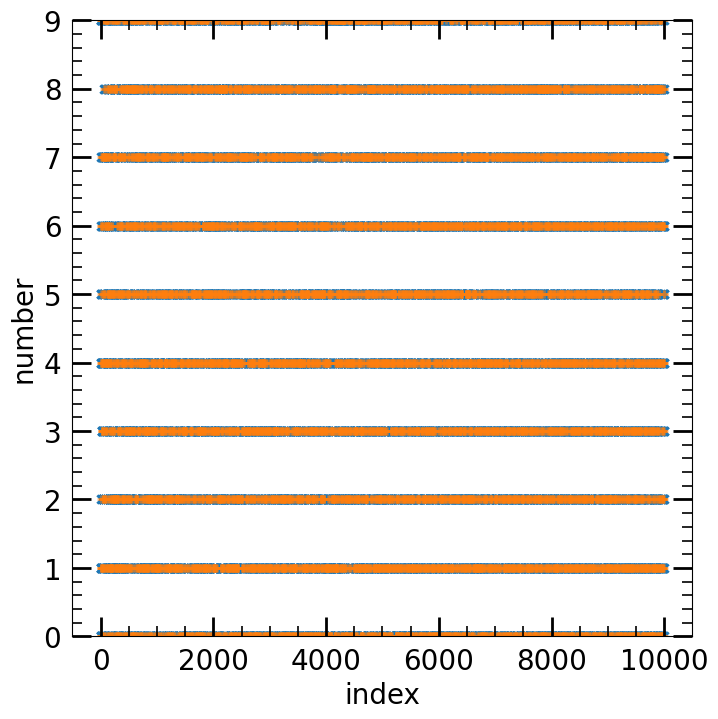

In [83]:
# load keras
from tensorflow import keras
(x_train, y_train),	(x_test, y_test) = keras.datasets.mnist.load_data()

# print
print(len(x_train), len(x_test), x_train[0].shape)
# print(y_train[0])
# mpl.rcParams['figure.figsize'] = 11, 8
# plt.matshow(x_train[1])
# plt.show()

# Normalizing the dataset 
x_train = x_train/255
x_test = x_test/255

# Flatting the dataset in order 
# to compute for model building 
x_train_flatten = x_train.reshape(len(x_train), 28*28) 
x_test_flatten = x_test.reshape(len(x_test), 28*28) 

# y_test_new = np.zeros_like(prediction)
# y_test_new[np.arange(y_test.size), y_test] = 1

# train model
model = keras.Sequential([ keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') ]) 
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] ) 
model.fit(x_train_flatten, y_train, epochs=5)

# evaluate
prediction = np.argmax(model.predict(x_test_flatten), axis=1)
results = model.evaluate(x_test_flatten, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

# plot
mpl.rcParams['figure.figsize'] = 8, 8
plt.scatter(np.arange(y_test.size), y_test, color=blue, marker='x')
plt.scatter(np.arange(y_test.size), prediction, color=orange, marker='+', alpha=0.5)
plt.ylim([0, 9])
plt.xlabel('index')
plt.ylabel('number')
plt.show()

# Multi-Layer Perceptron Learning in Tensorflow

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


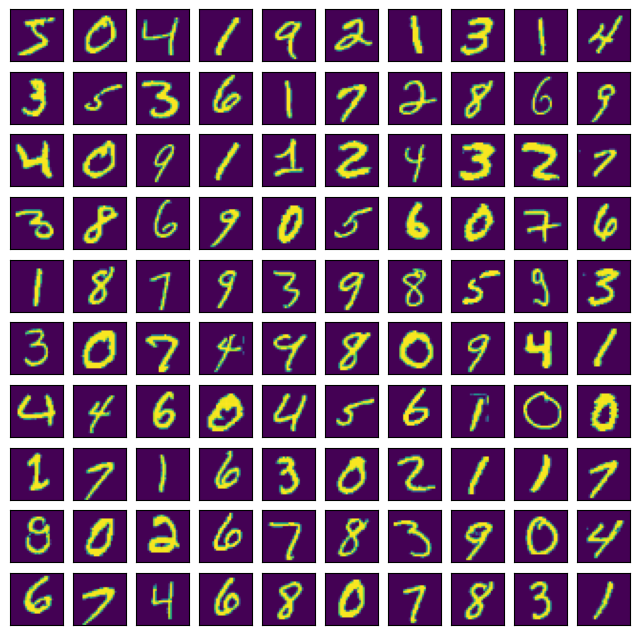

In [88]:
## Importing necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize image pixel values by dividing by 255 (grayscale)
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

# Visualizing 100 images from the training data
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        k += 1
plt.show()

In [93]:
# Building the Sequential neural network model
model = Sequential([
    # Flatten input from 28x28 images to 784 (28*28) vector
    Flatten(input_shape=(28, 28)),
  
    # Dense layer 1 (256 neurons)
    Dense(256, activation='sigmoid'),
  
    # Dense layer 2 (128 neurons)
    Dense(128, activation='sigmoid'),
  
    # Output layer (10 classes)
    Dense(10, activation='softmax'),
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model with training data
model.fit(x_train, y_train, epochs=10,
          batch_size=2000, 
          validation_split=0.2)

# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

Epoch 1/10
24/24 [==============================] - 1s 14ms/step - loss: 2.0870 - accuracy: 0.3585 - val_loss: 1.7376 - val_accuracy: 0.6202
Epoch 2/10
24/24 [==============================] - 0s 10ms/step - loss: 1.4050 - accuracy: 0.7232 - val_loss: 1.0555 - val_accuracy: 0.7997
Epoch 3/10
24/24 [==============================] - 0s 9ms/step - loss: 0.8921 - accuracy: 0.8096 - val_loss: 0.7022 - val_accuracy: 0.8536
Epoch 4/10
24/24 [==============================] - 0s 9ms/step - loss: 0.6356 - accuracy: 0.8563 - val_loss: 0.5215 - val_accuracy: 0.8801
Epoch 5/10
24/24 [==============================] - 0s 9ms/step - loss: 0.4954 - accuracy: 0.8813 - val_loss: 0.4212 - val_accuracy: 0.8985
Epoch 6/10
24/24 [==============================] - 0s 10ms/step - loss: 0.4145 - accuracy: 0.8959 - val_loss: 0.3636 - val_accuracy: 0.9068
Epoch 7/10
24/24 [==============================] - 0s 9ms/step - loss: 0.3650 - accuracy: 0.9038 - val_loss: 0.3273 - val_accuracy: 0.9137
Epoch 8/10
24/24 

# Neural Network with two hidden layers

In [47]:
# read mnist data
data = pd.read_csv('mnist.csv')

data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

# testing data
test_size = 20000 
data_test = data[0:test_size].T
Y_test = data_test[0]
X_test = data_test[1:n] / 255.

# training data
data_train = data[test_size:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.
_,m_train = X_train.shape

print('training size : ', X_train.shape, Y_train.shape)
print('test size     : ', X_test.shape,  Y_test.shape)

training size :  (784, 22000) (22000,)
test size     :  (784, 20000) (20000,)


In [45]:
# import data and libs
from neural_network import NN
import time

# gradient descent - neural network
nn = NN(label_number=10, alpha=0.1, epoch=500, activation='ReLU', layer_size=[784, 10, 10, 10])
nn.print_parameter()
t = time.process_time()
W1, b1, W2, b2, W3, b3 = nn.gradient_descent(X_train, Y_train)
elapsed_time = time.process_time() - t
dev_predictions = nn.predictions(X_test, W1, b1, W2, b2, W3, b3)
print("Accuracy: ", nn.get_accuracy(dev_predictions, Y_test), "Loss: ", nn.get_loss(dev_predictions, Y_test))
print('Elapsed time(GD): ', elapsed_time)


NN parameters:
number of labels   =  10
epoch              =  500
learning_rate      =  0.1
activation         =  ReLU
accuracy           =  0.9
batch size for SGD =  32
gradient clip      =  None
gamma              =  0.9
beta               =  0.9
beta1              =  0.9
beta2              =  0.999

Epoch:  0 Accuracy:  0.1020909090909091 CE Loss:  2.3807149490357076
Epoch:  100 Accuracy:  0.7240909090909091 CE Loss:  0.9461338006955535
Epoch:  200 Accuracy:  0.8381818181818181 CE Loss:  0.5340443829755714
Epoch:  300 Accuracy:  0.8776363636363637 CE Loss:  0.41197538407476103
Epoch:  400 Accuracy:  0.8923181818181818 CE Loss:  0.3641919230516928
Accuracy:  0.89905 Loss:  0.8156
Elapsed time(GD):  102.75


In [63]:
# stochastic gradient descent - neural network
nn = NN(label_number=10, alpha=0.1, epoch=500, activation='ReLU', layer_size=[784, 10, 10, 10], accuracy=0.9, batch_size=32, gradient_clip=1.0)
nn.print_parameter()
t = time.process_time()
W1, b1, W2, b2, W3, b3 = nn.stochastic_gradient_descent(X_train, Y_train)
elapsed_time = time.process_time() - t
dev_predictions = nn.predictions(X_test, W1, b1, W2, b2, W3, b3)
print("Accuracy: ", nn.get_accuracy(dev_predictions, Y_test), "Loss: ", nn.get_loss(dev_predictions, Y_test))
print('Elapsed time(SGD): ', elapsed_time)


NN parameters:
number of labels   =  10
epoch              =  500
learning_rate      =  0.1
activation         =  ReLU
accuracy           =  0.9
batch size for SGD =  32
gradient clip      =  1.0
gamma              =  0.9
beta               =  0.9
beta1              =  0.9
beta2              =  0.999

Epoch:  0 Accuracy:  0.8773636363636363
Epoch:  100 Accuracy:  0.9619545454545455
Accuracy:  0.91715 Loss:  0.660975
Elapsed time(SGD):  45.671875


In [271]:
# adam - neural network
nn = NN(label_number=10, alpha=0.1, epoch=500, activation='ReLU', layer_size=[784, 10, 10, 10], accuracy=0.9, batch_size=32, beta1=0.9, beta2=0.999)
nn.print_parameter()
t = time.process_time()
W1, b1, W2, b2, W3, b3 = nn.adam(X_train, Y_train)
elapsed_time = time.process_time() - t
dev_predictions = nn.predictions(X_test, W1, b1, W2, b2, W3, b3)
print("Accuracy: ", nn.get_accuracy(dev_predictions, Y_test), "Loss: ", nn.get_loss(dev_predictions, Y_test))
print('Elapsed time(adam): ', elapsed_time)


NN parameters:
number of labels   =  10
epoch              =  500
learning_rate      =  0.1
activation         =  ReLU
accuracy           =  0.9
batch size for SGD =  32
gradient clip      =  None
gamma              =  0.9
beta               =  0.9
beta1              =  0.9
beta2              =  0.999

Epoch:  0 Accuracy:  0.09686363636363636
Epoch:  100 Accuracy:  0.09686363636363636
Epoch:  200 Accuracy:  0.09686363636363636
Epoch:  300 Accuracy:  0.09686363636363636
Epoch:  400 Accuracy:  0.09686363636363636
Accuracy:  0.10005 Loss:  13.902175
Elapsed time(adam):  240.75


# Convolution neural network

## cat and dog

In [68]:
# import library
import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg 

['cat', 'dog']


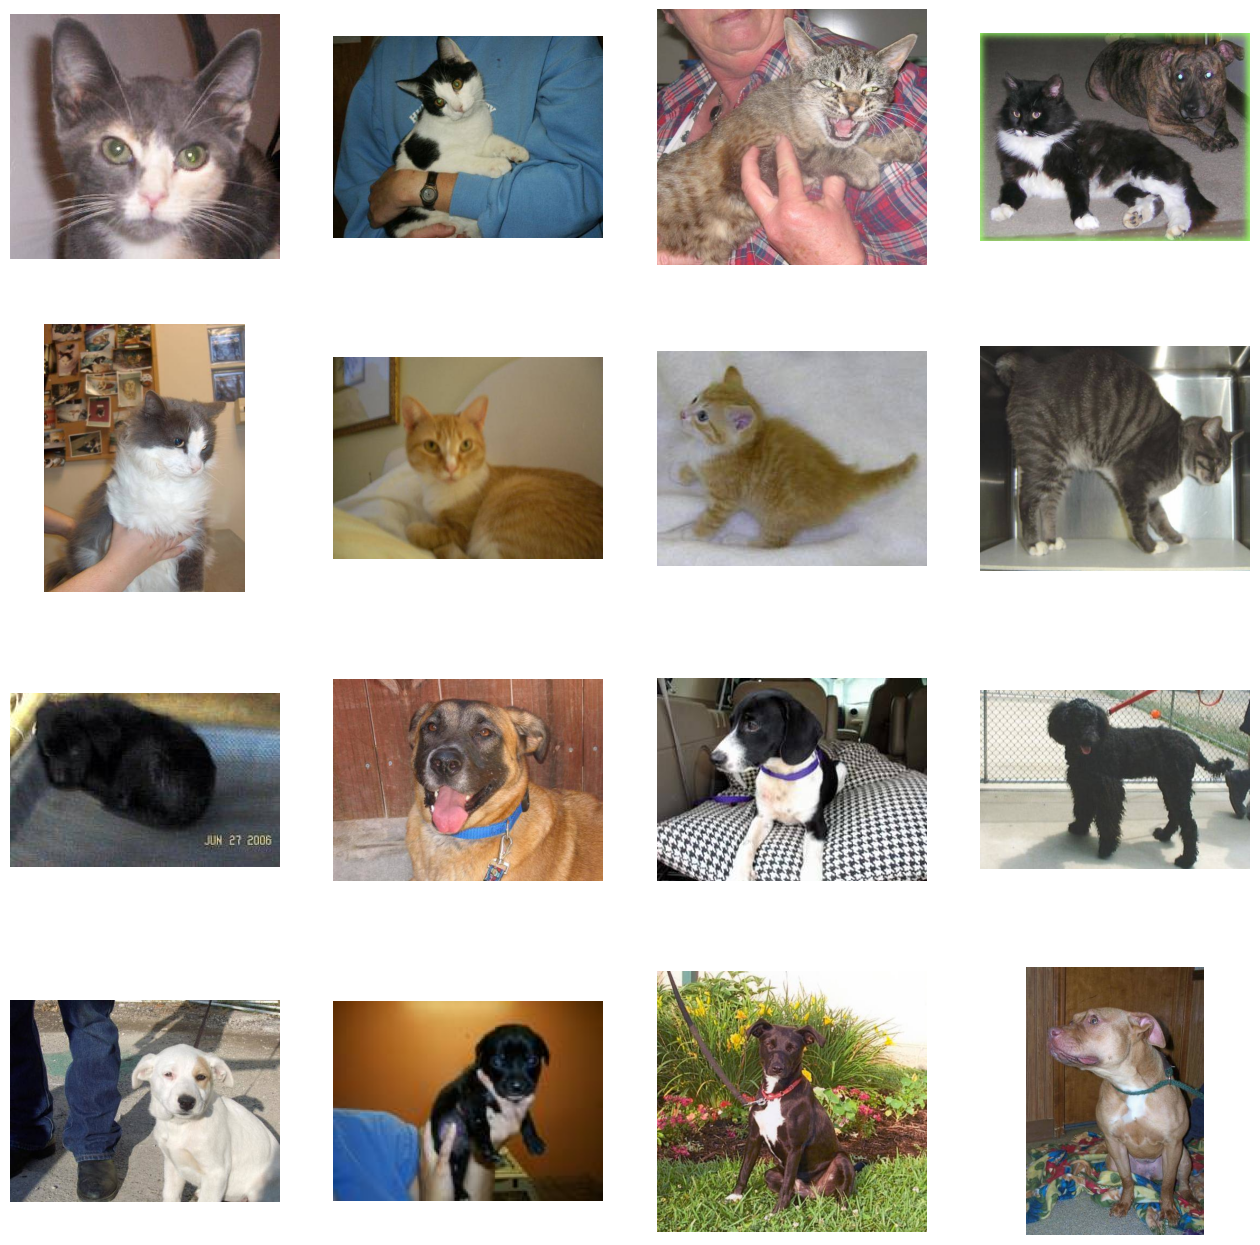

In [57]:
# read data
path = 'photo/dog-vs-cat'
classes = os.listdir(path)
print(classes)

fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('photo/dog-vs-cat/cat')
dog_dir = os.path.join('photo/dog-vs-cat/dog')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

# output
for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [59]:
# test and train data
base_dir = 'photo/dog-vs-cat'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


In [64]:
# model
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

# compile
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [65]:
# fit
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 166s 233ms/step - accuracy: 0.5752 - loss: 0.7596 - val_accuracy: 0.6136 - val_loss: 0.6545
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 154s 219ms/step - accuracy: 0.6487 - loss: 0.6256 - val_accuracy: 0.7560 - val_loss: 0.5105
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 173s 246ms/step - accuracy: 0.7265 - loss: 0.5449 - val_accuracy: 0.7832 - val_loss: 0.4599
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 165s 235ms/step - accuracy: 0.7875 - loss: 0.4530 - val_accuracy: 0.7384 - val_loss: 0.6389
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 166s 235ms/step - accuracy: 0.7944 - loss: 0.4437 - val_accuracy: 0.5584 - val_loss: 1.4294
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 165s 234ms/step - accuracy: 0.6137 - loss: 0.6583 - val_accuracy: 0.6456 - val_loss: 0.6722
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 149s 211ms/step - accuracy: 0.7377 - loss: 0.5253 - val_accuracy: 0.8092 - val_loss: 0.6461
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 152s 216ms/step - accuracy: 0.8139 -

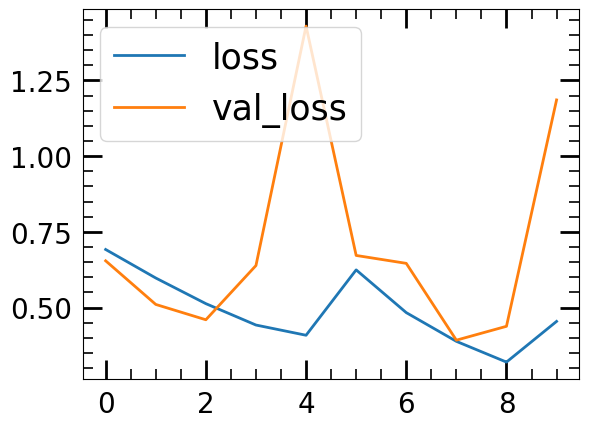

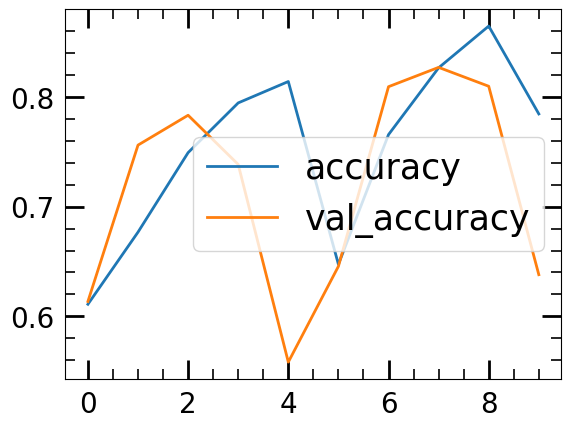

In [66]:
# model plot
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Dog


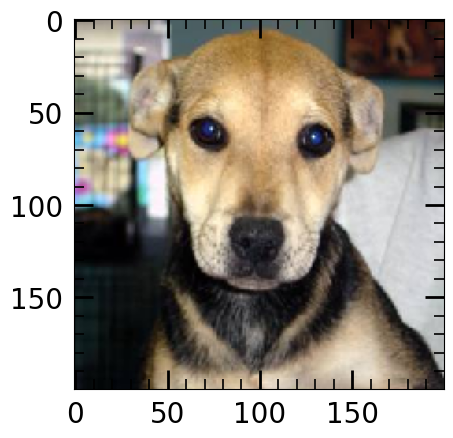

In [74]:
#Input image
test_image = image.load_img('photo/dog-vs-cat/dog/dog.4.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")

## lung cancer

In [46]:
# import library
from PIL import Image
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# import sklearn as sk
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# import cv2
import warnings
warnings.filterwarnings('ignore')

In [47]:
# read data
path = 'photo/lung_colon_image_set/lung_image_sets'
classes = os.listdir(path)
print(classes)

['lung_aca', 'lung_n', 'lung_scc']


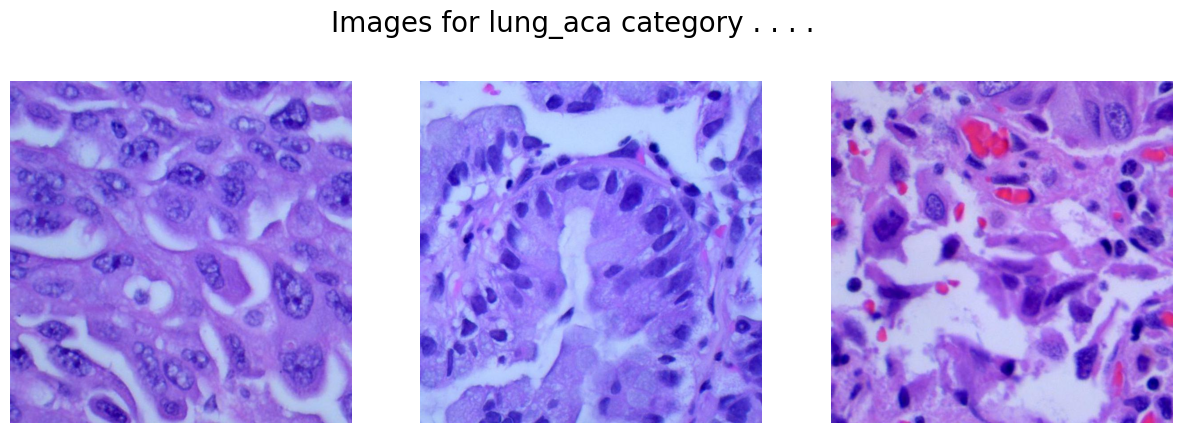

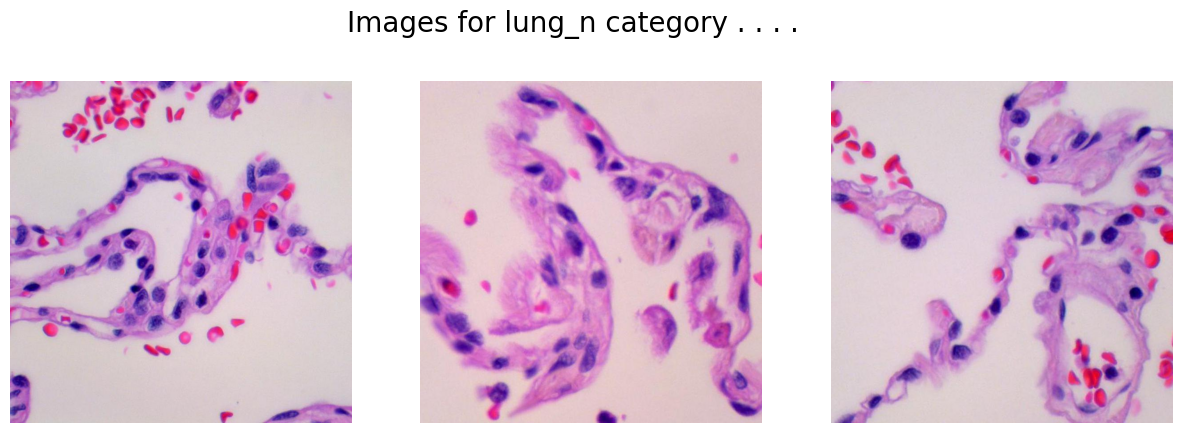

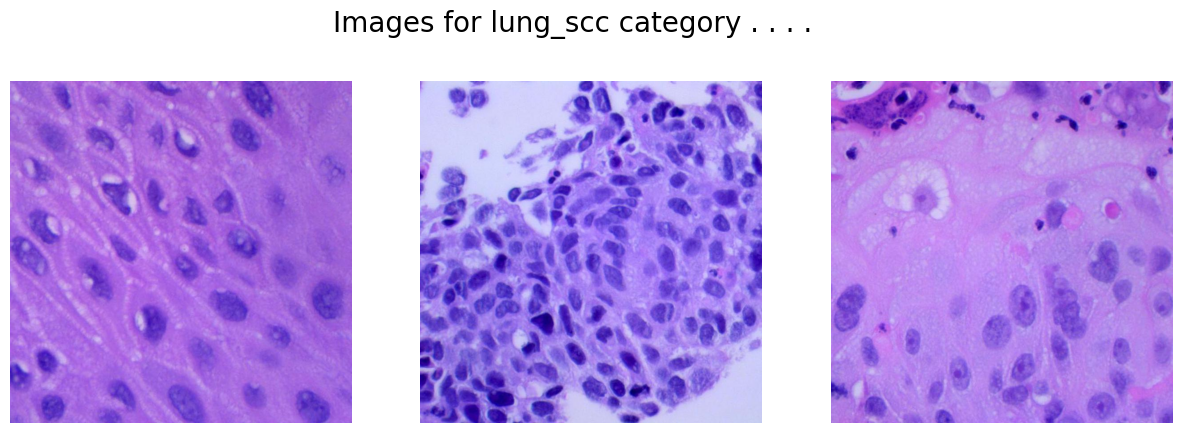

In [48]:
# data plot
path = 'photo/lung_colon_image_set/lung_image_sets'

for cls in classes:
	image_dir = f'{path}/{cls}'
	images = os.listdir(image_dir)

	fig, ax = plt.subplots(1, 3, figsize=(15, 5))
	fig.suptitle(f'Images for {cls} category . . . .', fontsize=20)

	for i in range(3):
		k = np.random.randint(0, len(images))
		img = np.array(Image.open(f'{path}/{cls}/{images[k]}'))
		ax[i].imshow(img)
		ax[i].axis('off')
	plt.show()

In [49]:
# data preparation
IMG_SIZE = 256
SPLIT = 0.2
EPOCHS = 10
BATCH_SIZE = 64

X = list()
Y = list()

for i, cls in enumerate(classes):
    images = glob.glob(f'{path}/{cls}/*.jpeg')
    
    for image in images:
        img = cv2.imread(image)

        X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
        Y.append(i)
    
X = np.asarray(X)
one_hot_encoded_Y = pd.get_dummies(Y).values


X_train, X_val, Y_train, Y_val = sk.model_selection.train_test_split(X, one_hot_encoded_Y,
												test_size = SPLIT,
												random_state = 2022)
print(X_train.shape, X_val.shape)

(12000, 256, 256, 3) (3000, 256, 256, 3)


In [51]:
# model
model = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(filters=32,
				kernel_size=(5, 5),
				activation='relu',
				input_shape=(IMG_SIZE,
							IMG_SIZE,
							3),
				padding='same'),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Conv2D(filters=64,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Conv2D(filters=128,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(256, activation='relu'),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dropout(0.3),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

# keras.utils.plot_model(
# 	model,
# 	show_shapes = True,
# 	show_dtype = True,
# 	show_layer_activations = True
# )

model.compile(
	optimizer = 'adam',
	loss = 'categorical_crossentropy',
	metrics = ['accuracy']
)


class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if logs.get('val_accuracy') > 0.90:
			print('\n Validation accuracy has reached upto \
					90% so, stopping further training.')
			self.model.stop_training = True


es = tf.keras.callbacks.EarlyStopping(patience=3,
				monitor='val_accuracy',
				restore_best_weights=True)

lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
					patience=2,
					factor=0.5,
					verbose=1)

history = model.fit(X_train, Y_train,
					validation_data = (X_val, Y_val),
					batch_size = BATCH_SIZE,
					epochs = EPOCHS,
					verbose = 1,
					callbacks = [es, lr, myCallback()])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 256, 256, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      33,554,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,684,291 (128.50 MB)

 Trainable params: 33,683,523 (128.49 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.7773 - loss: 0.5281 - val_accuracy: 0.3853 - val_loss: 10.3478 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.8824 - loss: 0.2900 - val_accuracy: 0.7187 - val_loss: 0.8953 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.9014 - loss: 0.2320 - val_accuracy: 0.8127 - val_loss: 0.5684 - learning_rate: 0.0010
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.9265 - loss: 0.1816 - val_accuracy: 0.6563 - val_loss: 1.9176 - learning_rate: 0.0010
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.9439 - loss: 0.1489  
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
188/188 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.9439 - loss: 0.1488 - val_accuracy: 0.6133 - val_loss: 1.7600 - learning_rate: 0.0010
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9613 - loss:

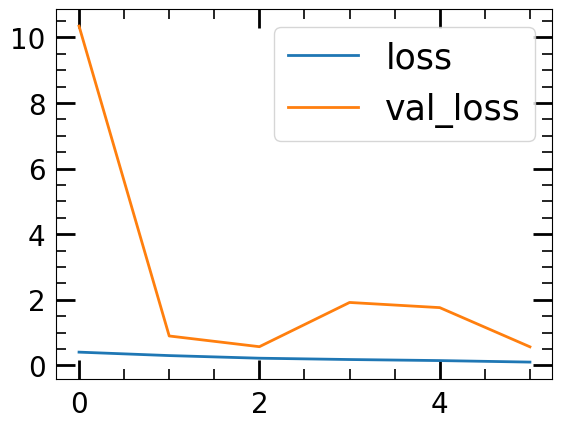

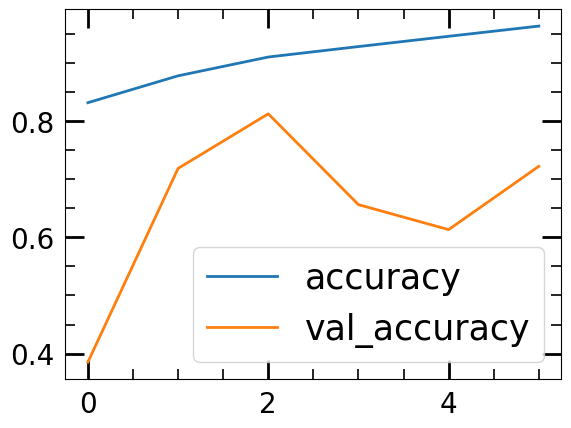

In [52]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

In [53]:
# prediction
Y_pred = model.predict(X_val)
Y_val = np.argmax(Y_val, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)

sk.metrics.confusion_matrix(Y_val, Y_pred)

print(sk.metrics.classification_report(Y_val, Y_pred,
									target_names=classes))

94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step
              precision    recall  f1-score   support

    lung_aca       0.87      0.51      0.64       987
      lung_n       0.87      0.99      0.93       977
    lung_scc       0.74      0.93      0.82      1036

    accuracy                           0.81      3000
   macro avg       0.83      0.81      0.80      3000
weighted avg       0.82      0.81      0.80      3000



# Neural network with cuda

In [2]:
# read mnist data
data = pd.read_csv('mnist.csv')

data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

# testing data
test_size = 20000 
data_test = data[0:test_size].T
Y_test = data_test[0]
X_test = data_test[1:n] / 255.

# training data
data_train = data[test_size:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.
_,m_train = X_train.shape

print('training size : ', X_train.shape, Y_train.shape)
print('test size     : ', X_test.shape,  Y_test.shape)

training size :  (784, 22000) (22000,)
test size     :  (784, 20000) (20000,)


In [9]:
import neural_network_cuda as nnc

nnc.sample_size = X_train.shape[1]
nnc.layer_size = [X_train.shape[0], 256, 128, 10]
nnc.print_parameter()

w1, b1, w2, b2, w3, b3, z1, a1, z2, a2, z3, a3, dw1, db1, dw2, db2, dw3, db3 = nnc.initialze()


NN parameters:
sample size        =  22000
number of labels   =  10
epoch              =  500
learning_rate      =  0.1
activation         =  ReLU
layer size         =  [784, 256, 128, 10]
accuracy           =  0.9
batch size for SGD =  32
gradient clip      =  None
gamma              =  0.9
beta               =  0.9
beta1              =  0.9
beta2              =  0.999
threadsperblock    =  (32, 32)



In [ ]:
# multiplication
# matmul[blockspergrid, threadsperblock](d_w1, d_X, d_z1)
z1, a1, z2, a2, z3, a3, dw1, db1, dw2, db2, dw3, db3 = nnc.gd(z1, a1, z2, a2, z3, a3, w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, X_train, Y_train)
print(z1.min(), z1.max(), a1.min(), a1.max())
print(z2.min(), z2.max(), a2.min(), a2.max())
print(z3.min(), z3.max(), a3.min(), a3.max())
print(dw1.min(), dw1.max(), db1.min(), db1.max())
print(dw2.min(), dw2.max(), db2.min(), db2.max())
print(dw3.min(), dw3.max(), db3.min(), db3.max())

In [ ]:
-0.853882547797293 0.7465882415165992 0.0 0.7465882415165992
-0.48498727394157426 0.39779539743253145 0.0 0.39779539743253145
-0.49941509681116936 0.5315472456928342 2.7803668849452526e-06 7.795489011208228e-06
-0.06641058913748454 0.05343821997749651 0.22435460367885163 0.22435460367885163
-0.026287898344750774 0.03466257271082315 -1.1058877669798 -1.1058877669798
-0.030948366174245068 2.3689291532020415e-10 -0.9999545454545454 -0.9999545454545454

# read data

In [3]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            print(magic, size, rows, cols)
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img      
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)   

2051 60000 28 28
2051 10000 28 28
(60000, 28, 28)


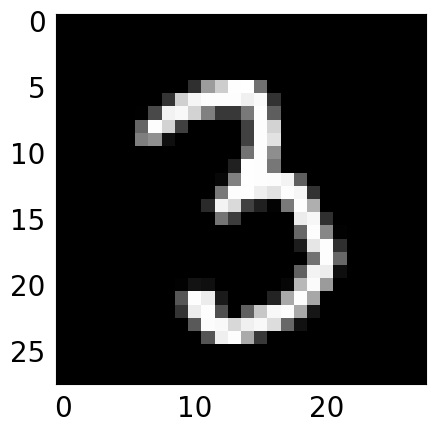

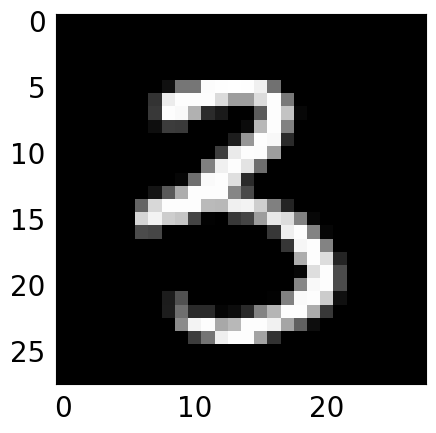

In [4]:
#
# Set file paths based on added MNIST Datasets
#
input_path = 'C++/ML_cuda/data/'
training_images_filepath = join(input_path, 'train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels.idx1-ubyte')

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

print(np.array(x_train).shape)

plt.imshow(x_train[30000], cmap=plt.cm.gray)
plt.show()
plt.imshow(x_test[5000], cmap=plt.cm.gray)
plt.show()

In [9]:
# int
x_train_array = np.array(x_train, dtype=np.int16)
x_test_array = np.array(x_test, dtype=np.int16)
np.savetxt('x_train.txt', x_train_array.reshape((60000, 28 * 28)), fmt='%d')
np.savetxt('x_test.txt', x_test_array.reshape((10000, 28 * 28)), fmt='%d')

In [11]:
# int
y_train_array = np.array(y_train, dtype=np.int16)
y_test_array = np.array(y_test, dtype=np.int16)
print(y_train_array.shape, y_test_array.shape)
np.savetxt('y_train.txt', y_train_array.reshape((60000, 1)), fmt='%d')
np.savetxt('y_test.txt', y_test_array.reshape((10000, 1)), fmt='%d')

(60000,) (10000,)


In [5]:
print(int(3==3), int(3==1))

1 0


In [ ]:
true=1.0, false=0.0